In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('default')

import seaborn as sns
import plotly
import plotly.express as px

In [2]:
churn_data = pd.read_csv('data/churn.csv')
df = churn_data.copy()
df = df.drop(['RowNumber'], axis=1)
#df.head()
#df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


Столбцы таблицы:

1. RowNumber — номер строки таблицы (это лишняя информация, поэтому можете сразу от неё избавиться)
2. CustomerId — идентификатор клиента
3. Surname — фамилия клиента
4. CreditScore — кредитный рейтинг клиента (чем он выше, тем больше клиент брал кредитов и возвращал их)
5. Geography — страна клиента (банк международный)
6. Gender — пол клиента
7. Age — возраст клиента
8. Tenure — сколько лет клиент пользуется услугами банка
9. Balance — баланс на счетах клиента в банке
10. NumOfProducts — количество услуг банка, которые приобрёл клиент
11. HasCrCard — есть ли у клиента кредитная карта (1 — да, 0 — нет)
12. IsActiveMember — есть ли у клиента статус активного клиента банка (1 — да, 0 — нет)
13. EstimatedSalary — предполагаемая заработная плата клиента
14. Exited — статус лояльности (1 — ушедший клиент, 0 — лояльный клиент)

## 1. Каково соотношение ушедших и лояльных клиентов? 

Покажите это на графике и дайте комментарий по соотношению.

In [3]:
display(df['Exited'].value_counts())
display(df['Exited'].value_counts()[0]/df['Exited'].value_counts()[1])

Exited
0    7963
1    2037
Name: count, dtype: int64

3.9091801669121256

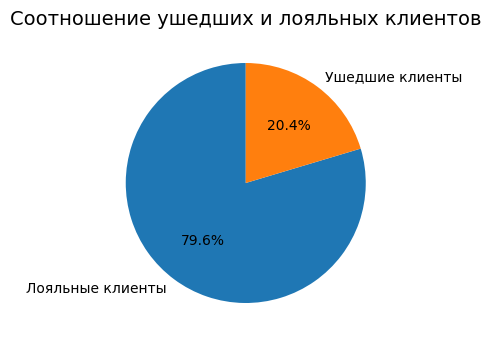

In [4]:
fig = plt.figure(figsize=(3, 3))
ax = fig.add_axes((1, 1, 1, 1))
counts = df['Exited'].value_counts()
pie = ax.pie(
    counts,
    labels=['Лояльные клиенты', 'Ушедшие клиенты'],
    autopct='%1.1f%%',
    startangle=90
)
title = ax.set_title('Cоотношение ушедших и лояльных клиентов', fontsize=14)
plt.show(pie)


#### Комментарий: 
Количество лояльных клиентов больше ушедших в 3.9 раза. 
Доля ушедших клиентов 20.4%.

## 2. Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. 
Опишите распределение и сделайте выводы.

<Axes: title={'center': 'Гистограмма распределения Баланса у пользователей (свыше 2500$)'}, ylabel='Frequency'>

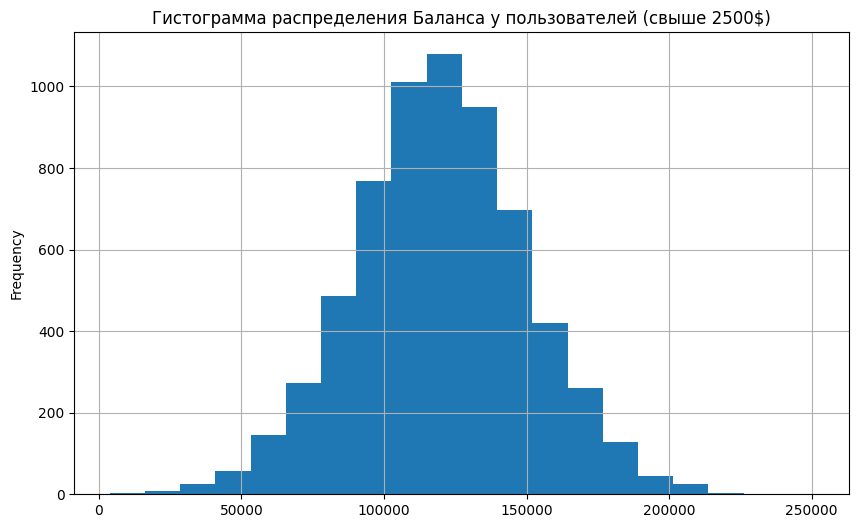

In [5]:
balance2500 = df[df['Balance'] > 2500]

balance2500['Balance'].plot(
    kind='hist',
    figsize=(10, 6),
    title='Гистограмма распределения Баланса у пользователей (свыше 2500$)',
    grid=True,
    bins=20
)

Text(0.5, 0, 'Баланс')

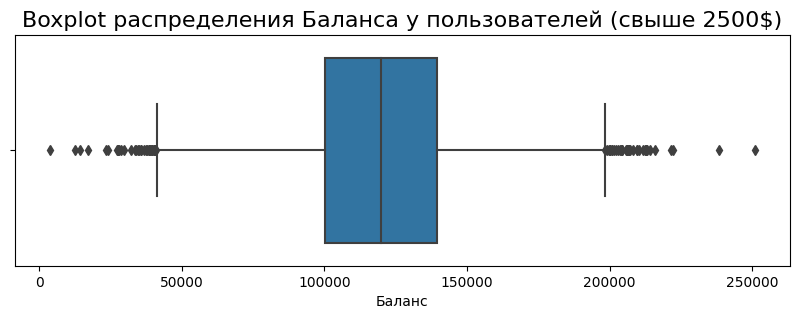

In [6]:
fig = plt.figure(figsize=(10, 3))
boxplot = sns.boxplot(data=balance2500, x='Balance')
boxplot.set_title('Boxplot распределения Баланса у пользователей (свыше 2500$)', fontsize=16)
boxplot.set_xlabel('Баланс')

#### Комментарий: 
Распределение баланса клиентов (свыше 2500$) выглядит как нормальное распределение.

* Среднее (и медианное значение) находится около 120 тыс.$
* Минимальные и максимальные значения - 3.7 и 250 тыс.$
* У большинства клиентов на балансе находится 100-140 тыс.$

## 3. Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? 
Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

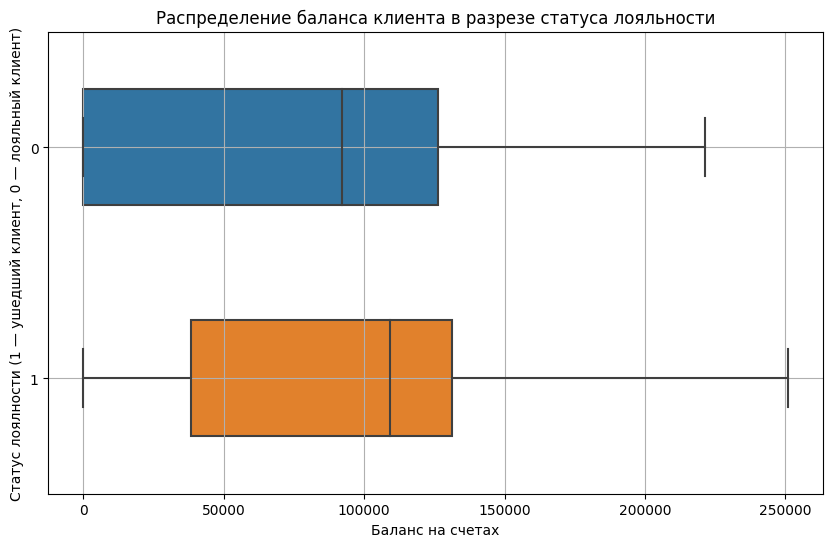

In [7]:
fig = plt.figure(figsize=(10, 6))
boxplot = sns.boxplot(
    data=df,
    x='Balance',
    y='Exited',
    orient='h',
    width=0.5
)
boxplot.set_title('Распределение баланса клиента в разрезе статуса лояльности');
boxplot.set_xlabel('Баланс на счетах');
boxplot.set_ylabel('Статус лоялности (1 — ушедший клиент, 0 — лояльный клиент)');
boxplot.grid()

Text(0.5, 0, 'Ушедшие клиенты')

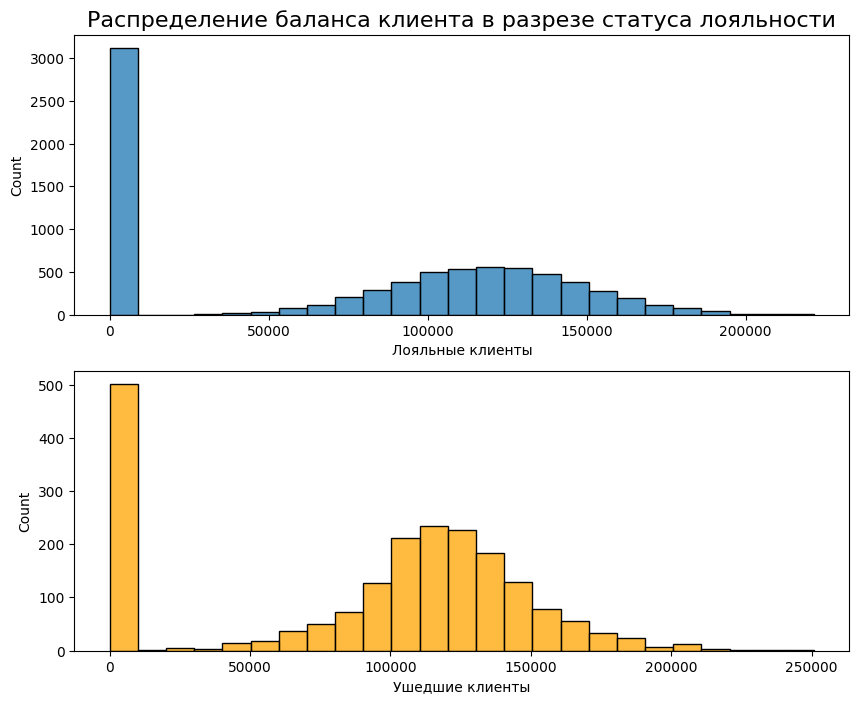

In [8]:
ex1 = df[df['Exited'] == 1]
ex0 = df[df['Exited'] == 0]
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))
sns.histplot(
    data=ex0,
    x='Balance',
    bins=25,
    ax=axes[0]
);
axes[0].set_title('Распределение баланса клиента в разрезе статуса лояльности', fontsize=16)
axes[0].set_xlabel('Лояльные клиенты')
sns.histplot(
    data=ex1,
    x='Balance',
    bins=25,
    color='orange',
    ax=axes[1]
);
axes[1].set_xlabel('Ушедшие клиенты')

#### Комментарий: 

Из boxplot видно, что у Ушедших клиентов баланс выше:

* Медиана у Ушедших сотавляет 109 тыс.$, лояльные - 92 тыс.$, 
* Максимальные значение у Ушедших больше чем у лояльных
* Межквартильный размах у Ушедших смешен правее 
(начинается от около 38 тыс.$, тогда как у Лояльных с 0 тыс.$)

Выводы из Гистограммы ("на глаз"):

* НЕбогатых Лояльных клиентов в 6 раз больше, при этом Богатых Лояльных клиентов всего в 2 раза больше (Напомню, что в среднем лояльных больше в 3.9 раза)

Таким образом, Банк теряет клиентов с более высоким баласном на счетах.


## 4. Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

In [9]:
df.groupby('Exited')['Age'].agg('describe')

,count,mean,std,min,25%,50%,75%,max
Exited,,,,,,,,
0,7963.0,37.408389,10.125363,18.0,31.0,36.0,41.0,92.0
1,2037.0,44.837997,9.761562,18.0,38.0,45.0,51.0,84.0


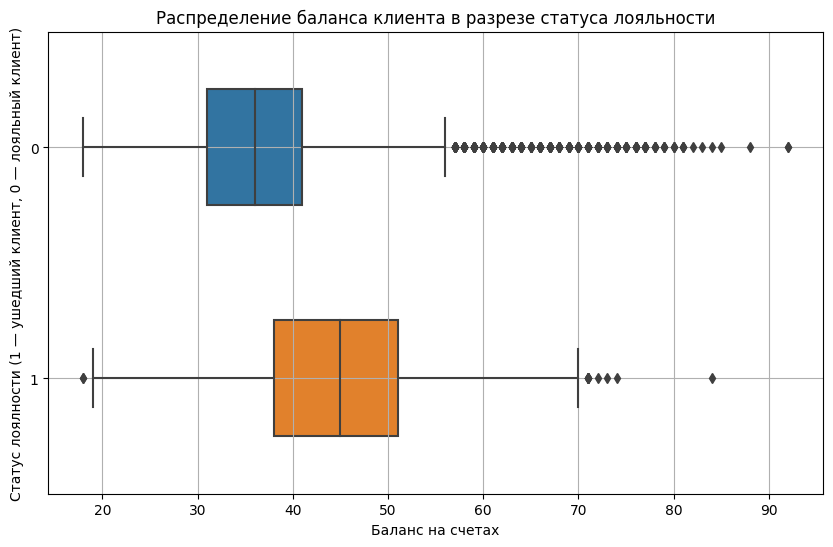

In [10]:
fig = plt.figure(figsize=(10, 6))
boxplot = sns.boxplot(
    data=df,
    x='Age',
    y='Exited',
    orient='h',
    width=0.5
)
boxplot.set_title('Распределение баланса клиента в разрезе статуса лояльности');
boxplot.set_xlabel('Баланс на счетах');
boxplot.set_ylabel('Статус лоялности (1 — ушедший клиент, 0 — лояльный клиент)');
boxplot.grid()


#### Комментарий: 

Лояльные клинты моложе. Средний возраст 37 (медиана 36). В данной категории наблюдается наибольшое число потенциальных выбросов (примерно после 56 лет)

Ушедшие клиенты старше. Средний возраст 45 лет.

## 5. Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.



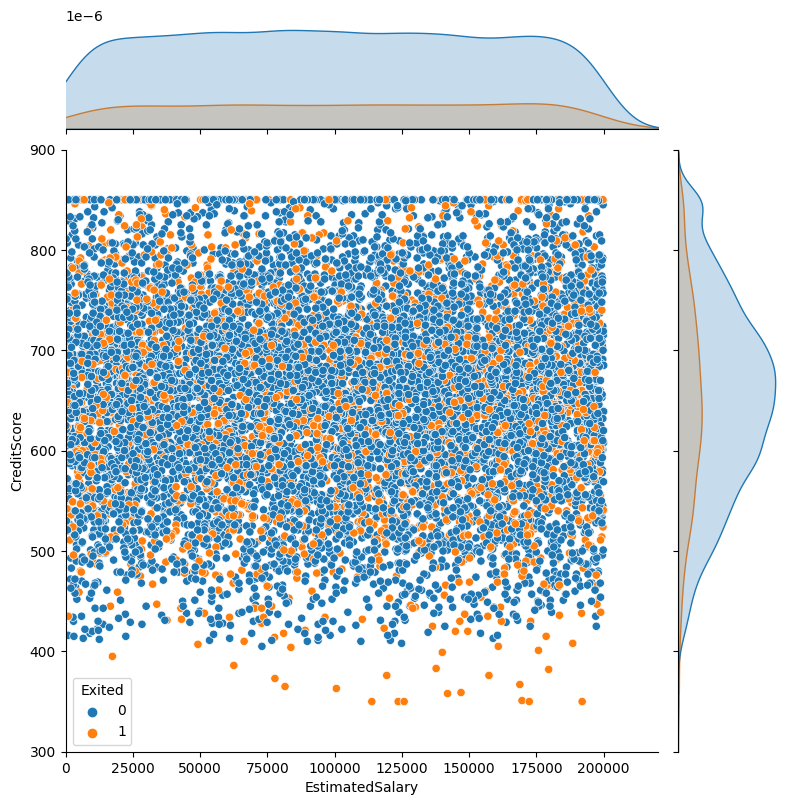

In [11]:
jointplot = sns.jointplot(
    data=df, 
    x='EstimatedSalary', 
    y='CreditScore',
    hue='Exited',
    xlim = (0, 220000),
    ylim = (300, 900),
    height=8,
)

#### Комментарий: 

Взаимосвязи кредитного рейтинга и предполагаемой зарплаты не обнаружено.

Выделяется небольшая группа клиентов (ушедших) с невысоким рейтингом меньше 400.

## 6. Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.

Подсказка
Процент ушедших клиентов в каждой группе можно рассчитать как среднее по столбцу Exited (так как 1 — это ушедшие клиенты, а 0 — лояльные, среднее арифметическое по столбцу обозначает долю ушедших клиентов).

In [12]:
df_gender = df.groupby(['Gender'])['Exited'].mean()

fig = px.bar(
    data_frame=df_gender,
    x=df_gender.index,
    y='Exited',
    height=400,
    width=500,
    #color='orange',
    title='Percentage of departed customers by Gender'
)
fig.show()

Text(0.5, 1.0, 'Female')

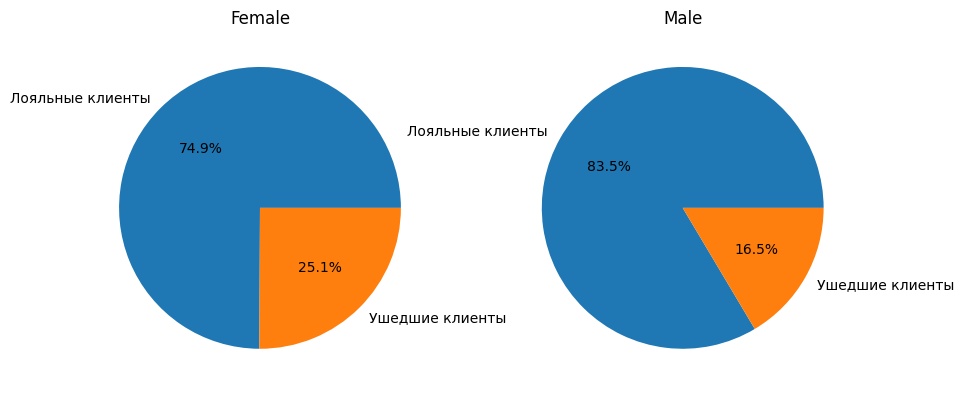

In [13]:
df_male = df[df['Gender'] == 'Male']['Exited'].value_counts()
df_female = df[df['Gender'] == 'Female']['Exited'].value_counts()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
axes[1].pie(
    df_male,
    labels=['Лояльные клиенты', 'Ушедшие клиенты'],
    autopct='%.1f%%'
);
axes[1].set_title('Male')

axes[0].pie(
    df_female,
    labels=['Лояльные клиенты', 'Ушедшие клиенты'],
    autopct='%.1f%%'
);
axes[0].set_title('Female')


#### Комментарий: 

Женщины уходят чаще - каждая 4 женщина перестала пользоваться услугами банка (25%).

Среди мужчин процент ушедших составляет 16.5% (ниже чем у женщин на 8.6) 

## 7. Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.



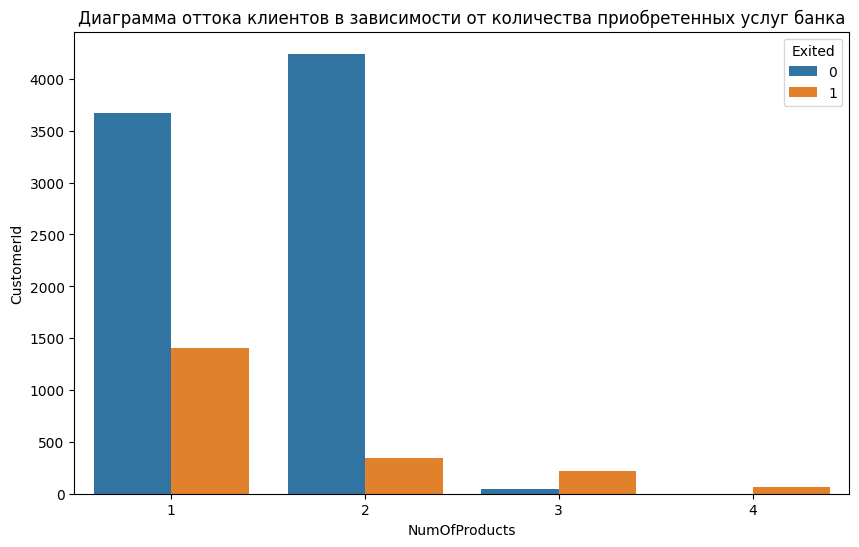

In [14]:
fig = plt.figure(figsize=(10, 6))

barplot = sns.barplot(
    data=df,
    x='NumOfProducts',
    y='CustomerId',
    hue='Exited',
    estimator='count_nonzero' 
)
barplot.set_title('Диаграмма оттока клиентов в зависимости от количества приобретенных услуг банка');

#### Комментарий: 

Количество приобретенных услуг у банка: 

1. Отток клиентов составил 38% по отношению к лояльным клиентам - достаточно существенная доля
2. Отток клиентов - 8%
3. Отток клиентов превышает лояльных в 4.7 раза
4. Все клиенты ушли

Чем больше услуг необходимо клиенту (3-4), тем выше вероятность, что клиент уйдет.

Предположу: что в категории (1 услуга), Ушедшие клиенты, присмотревшись к условиям, не стали оформлять доп.услуги и ушли.

## 8. Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?



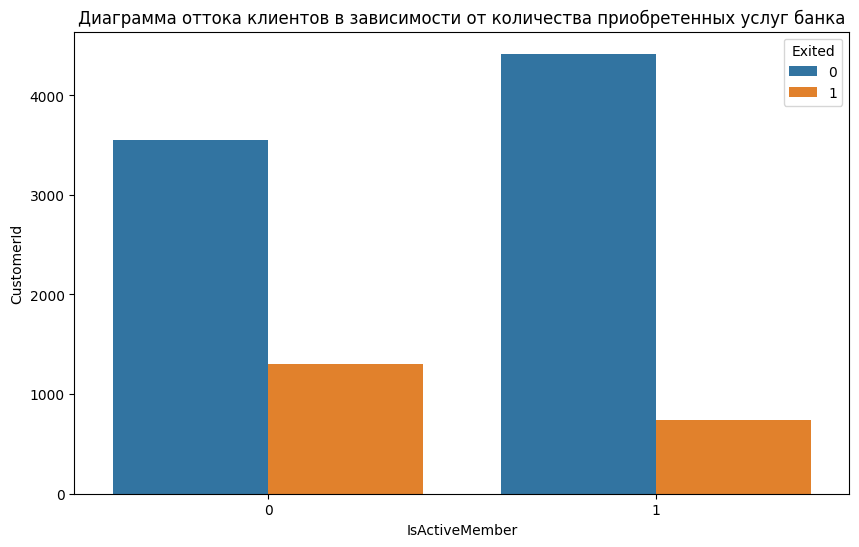

In [15]:
fig = plt.figure(figsize=(10, 6))

barplot = sns.barplot(
    data=df,
    x='IsActiveMember',
    y='CustomerId',
    hue='Exited',
    estimator='count_nonzero' 
)
barplot.set_title('Диаграмма оттока клиентов в зависимости от количества приобретенных услуг банка');


#### Комментарий: 

Среди "неактивных" Ушедших клиентов в 2 раза больше, чем среди "активных".

Так же если расматривать соотношение Лояльных и Ушедших в каждой категории "активности", доля "Ушедших" среди "неактивных" гораздо выше.

Рекомендации банку: 
1. Неактивным клиентам предлагать доп.услуги (чтобы количество услуг стало 2)
2. Понять, чем не устраивает ушедших клиентов доп.услуги (3-4). Изменить их

## 9. В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.

In [16]:
#группируем данные по Странам и вычисляем долю ушедших клиентов
df_country = df.groupby(['Geography'])['Exited'].mean()

#строим график
fig = px.choropleth(
    data_frame=df_country, #датафрейм
    locations=df_country.index, #столбец с локациями
    locationmode = "country names", #режим сопоставления локаций с базой plotly
    scope='europe', #Европа, в данных 3 Европейские страны
    color="Exited", #от чего зависит цвет
    range_color=[0, 0.4],
    title='Тепловая картаграмма Доли ушедших клиентов', #заголовок
    width=600, #ширина
    height=600, #высота
    color_continuous_scale='ylorrd' #палитра цветов
)

#отображаем его
fig.show()

## 10. Найдите на тепловой карте категории клиентов, которые уходят чаще всего.

Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.

Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (CreditScoreCat), а столбцами — количество лет, в течение которых клиент пользуется услугами банка (Tenure). В ячейках сводной таблицы должно находиться среднее по признаку оттока (Exited) — доля ушедших пользователей.

На основе полученной сводной таблицы постройте тепловую карту с аннотацией. Найдите на тепловой карте категории клиентов, которые уходят чаще всего.


In [17]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"

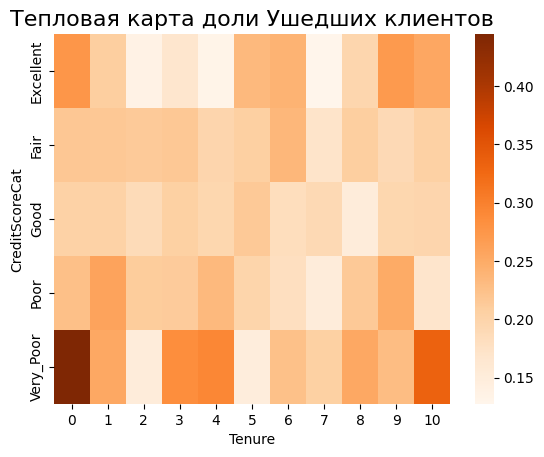

In [18]:
df['CreditScoreCat'] = df['CreditScore'].apply(get_credit_score_cat)
df['CreditScoreCat'] = df['CreditScoreCat'].astype('category')

pivot = df.pivot_table(
    values='Exited',
    index='CreditScoreCat',
    columns='Tenure'   
)

heatmap = sns.heatmap(data=pivot, cmap='Oranges')
heatmap.set_title('Тепловая карта доли Ушедших клиентов', fontsize=16);


#### Комментарий: 

Чаще всего уходят клиенты с очень низким кредитным рейтингом (Very_Poor) и менее года являются клиентами банка